# Term Project
##### Christina Camacho
##### DSC 530
##### August 10, 2024

### How does income, education level and employment status influence depression in an individual?

This project will look at data set collected to facilitate analysis in areas of health, lifestyle and socio-economic status. The data set is `depression_data.csv` (Find Open Datasets and Machine Learning Projects | Kaggle, n.d.). Based on common knowledge, it can be said that having a higher income or great employment status would decrease the chance of depression assuming the individual is living comfortable in a world where money and finances are very important aspects of life. Within this data, we will look at several variables to answer the above stated question. To look further int othe dat, we will see how these variables affect each other, find relevant patterns and make educated predictions. Fianlly we will test results to find if the hypothesis stated is accurate.

In [457]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [459]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [461]:
import thinkstats2
import thinkplot

In [269]:
#load dataset
depress_data = pd.read_csv (r"C:\Users\cpsla\Documents\christie\Summer 24\DSC530\depression_data.csv")
print(depress_data.head())
print(depress_data.columns)

               Name  Age Marital Status    Education Level  \
0  Christine Barker   31        Married  Bachelor's Degree   
1  Jacqueline Lewis   55        Married        High School   
2    Shannon Church   78        Widowed    Master's Degree   
3    Charles Jordan   58       Divorced    Master's Degree   
4      Michael Rich   18         Single        High School   

   Number of Children Smoking Status Physical Activity Level  \
0                   2     Non-smoker                  Active   
1                   1     Non-smoker               Sedentary   
2                   1     Non-smoker               Sedentary   
3                   3     Non-smoker                Moderate   
4                   0     Non-smoker               Sedentary   

  Employment Status     Income Alcohol Consumption Dietary Habits  \
0        Unemployed   26265.67            Moderate       Moderate   
1          Employed   42710.36                High      Unhealthy   
2          Employed  125332.79     

In [271]:
#clean dataset
#check missing values
depress_data.isnull().sum()

#handle missing values
depress_data = depress_data.dropna()

The 5 variables we will be looking at from this data will be `Income`, `Education Level`, `Employment Status`, `Sleep Patterns` and `Physical Activity Level`.

`Education Level`: The highest level of education attained by the individual. Possible values include High School, Associate Degree, Bachelor's Degree, Master's Degree, and PhD.

`Physical Activity Level`: The level of physical activity undertaken by the individual. Possible values include Sedentary, Moderate, and Active.

`Employment Status`: The employment status of the individual. Possible values include Employed and Unemployed.

`Income`: The annual income of the individual in USD.

`Sleep Patterns`: The quality of sleep. Possible values include Good, Fair, and Poor.

In [222]:
#make sure categorical variables are properly encoded
depress_data['Education Level'] = depress_data['Education Level'].astype('category')
depress_data['Physical Activity Level'] = depress_data['Physical Activity Level'].astype('category')
depress_data['Employment Status'] = depress_data['Employment Status'].astype('category')
depress_data['Income'] = depress_data['Income'].astype('category')
depress_data['Sleep Patterns'] = depress_data['Sleep Patterns'].astype('category')

#convert categorical variables to numerical codes
depress_data['Education Level'] = depress_data['Education Level'].cat.codes
depress_data['Employment Status'] = depress_data['Employment Status'].cat.codes
depress_data['Physical Activity Level'] = depress_data['Physical Activity Level'].cat.codes

In [224]:
#5 variables to be used
education_data = depress_data['Education Level']
physical_data = depress_data['Physical Activity Level']
employment_data = depress_data['Employment Status']
income_data = depress_data['Income']
sleep_data = depress_data['Sleep Patterns']

##### Histograms of each variables

C:\Users\cpsla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

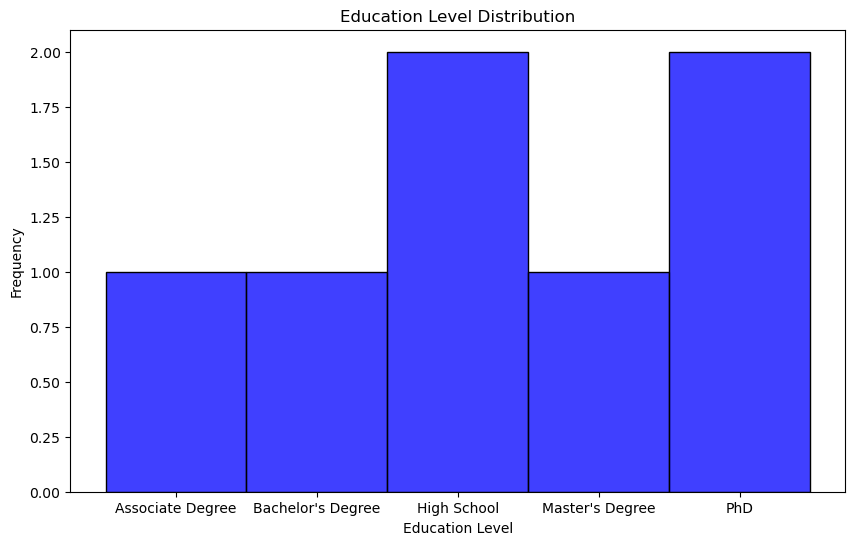

In [283]:
#histogram of Education Level
#new data set for categories
ed_depress_data = pd.DataFrame({
    'Education Level': ['High School', 'Associate Degree', 'Bachelor\'s Degree', 'Master\'s Degree', 'PhD', 'High School', 'PhD']
})

#convert categorical data to a category type
ed_depress_data['Education Level'] = ed_depress_data['Education Level'].astype('category')

#create a histogram for categorical data
plt.figure(figsize=(10, 6))
sns.histplot(ed_depress_data['Education Level'], discrete=True, kde=False, color="blue")
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

C:\Users\cpsla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

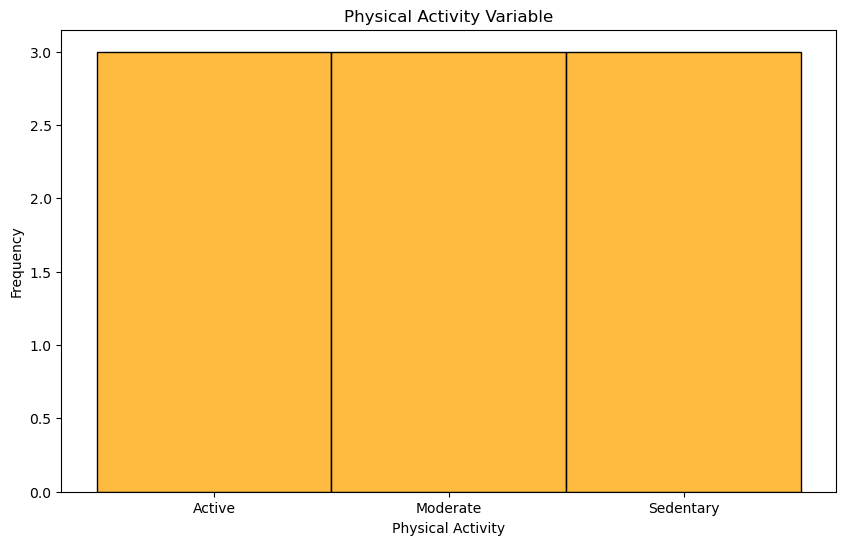

In [230]:
#histogram of Physical Activity Level
#new data set for categories
ph_depress_data = pd.DataFrame({
    'Physical Activity Level': ['Sedentary', 'Moderate', 'Active', 'Active', 'Sedentary', 'Moderate', 'Active', 'Moderate', 'Sedentary']
})

#convert categorical data to a category type
ph_depress_data['Physical Activity Level'] = ph_depress_data['Physical Activity Level'].astype('category')

#create a histogram for categorical data
plt.figure(figsize=(10, 6))
sns.histplot(ph_depress_data['Physical Activity Level'], discrete=True, kde=False, bins=3, color='orange')
plt.title('Physical Activity Variable')
plt.xlabel('Physical Activity')
plt.ylabel('Frequency')


C:\Users\cpsla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

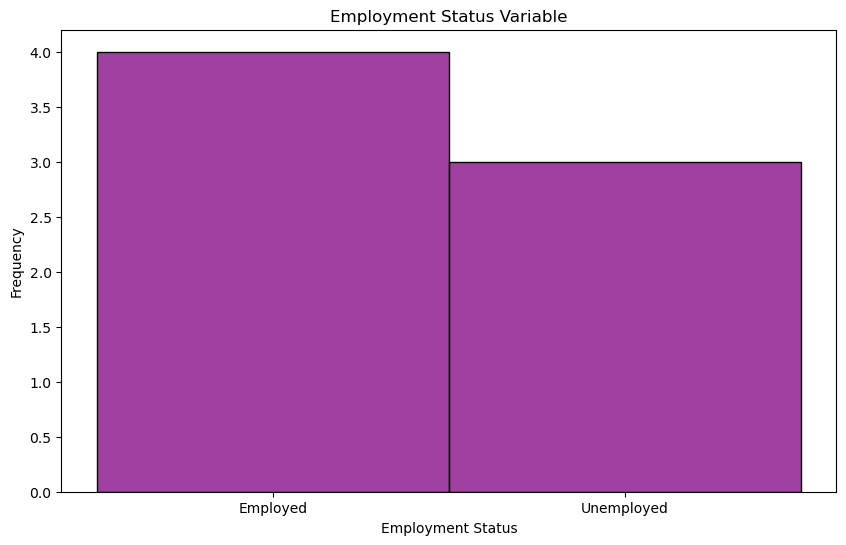

In [233]:
#new data set for categories
emp_depress_data = pd.DataFrame({
    'Employment Status': ['Employed', 'Unemployed', 'Employed', 'Unemployed', 'Employed', 'Unemployed', 'Employed']
})

#convert categorical data to a category type
emp_depress_data['Employment Status'] = emp_depress_data['Employment Status'].astype('category')

# Create a histogram for categorical data
plt.figure(figsize=(10, 6))
sns.histplot(emp_depress_data['Employment Status'], discrete=True, kde=False, color='purple')
plt.title('Employment Status Variable')
plt.xlabel('Employment Status')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

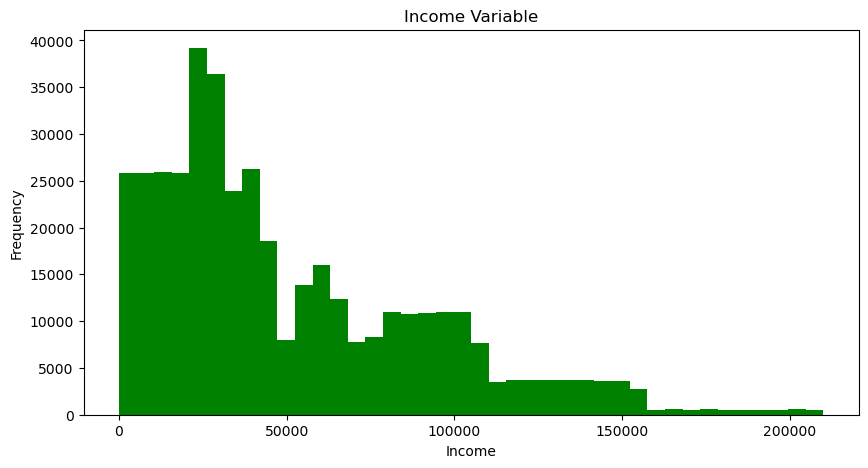

In [235]:
#histogram of Income
plt.figure(figsize=(10,5))
plt.hist(depress_data['Income'], bins=40, color='green')
plt.title('Income Variable')
plt.xlabel('Income')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

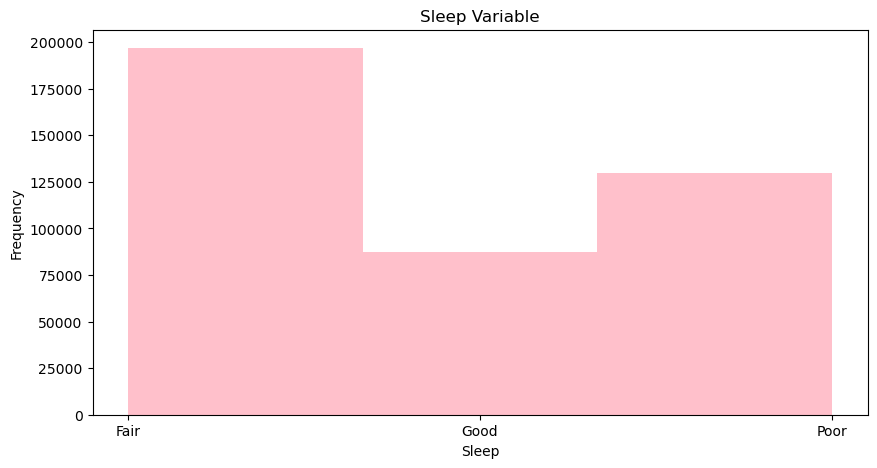

In [237]:
#histogram of Sleep Patterns
plt.figure(figsize=(10,5))
plt.hist(depress_data['Sleep Patterns'], bins=3, color='pink')
plt.title('Sleep Variable')
plt.xlabel('Sleep')
plt.ylabel('Frequency')

##### Mean, Mode, Spread, and Tails of variables.

In [240]:
#mean of Education Level
#map categories to numerical codes
ed_depress_data['Education Level Code'] = ed_depress_data['Education Level'].cat.codes

# Calculate the mean of the numerical codes
mean_code = ed_depress_data['Education Level Code'].mean()

#map the mean code back to the category names
education_levels = ed_depress_data['Education Level'].cat.categories
mean_education_level = education_levels[np.round(mean_code).astype(int)]

print(f"Mean: {mean_code}")
print(f"Mean Education Level (approx): {mean_education_level}")

#mode of Education Level
mode = ed_depress_data['Education Level'].mode()

print(f"Mode of Education Level: {mode[0]}")

#spread for Education Level
frequency_distribution = ed_depress_data['Education Level'].value_counts()

print("\nFrequency Distribution:")
print(frequency_distribution)

#tail for Education Level
tail = frequency_distribution[frequency_distribution == frequency_distribution.min()]
print("\nTail for Education Level:")
print(tail)


Mean: 2.2857142857142856
Mean Education Level (approx): High School
Mode of Education Level: High School

Frequency Distribution:
Education Level
High School          2
PhD                  2
Associate Degree     1
Bachelor's Degree    1
Master's Degree      1
Name: count, dtype: int64

Tail for Education Level:
Education Level
Associate Degree     1
Bachelor's Degree    1
Master's Degree      1
Name: count, dtype: int64


In [242]:
#mean of Physical Activity
#map categories to numerical codes
ph_depress_data['Physical Activity Level Code'] = ph_depress_data['Physical Activity Level'].cat.codes

# Calculate the mean of the numerical codes
mean_code = ph_depress_data['Physical Activity Level Code'].mean()

#map the mean code back to the category names
physical_activity_levels = ph_depress_data['Physical Activity Level'].cat.categories
mean_physical_activity_level = physical_activity_levels[np.round(mean_code).astype(int)]

print(f"Mean: {mean_code}")
print(f"Mean Physical Activity Level (approx): {mean_physical_activity_level}")

#mode of Physical Activity
mode = ph_depress_data['Physical Activity Level'].mode()

print(f"Mode of Physical Activity Level: {mode[0]}")

#spread for Physical Activity
frequency_distribution = ph_depress_data['Physical Activity Level'].value_counts()

print("\nFrequency Distribution:")
print(frequency_distribution)

#tail for Physical Activity
tail = frequency_distribution[frequency_distribution == frequency_distribution.min()]
print("\nTail for Physical Activity Level:")
print(tail)

Mean: 1.0
Mean Physical Activity Level (approx): Moderate
Mode of Physical Activity Level: Active

Frequency Distribution:
Physical Activity Level
Active       3
Moderate     3
Sedentary    3
Name: count, dtype: int64

Tail for Physical Activity Level:
Physical Activity Level
Active       3
Moderate     3
Sedentary    3
Name: count, dtype: int64


In [244]:
#mean of Employment Status
#map categories to numerical codes
emp_depress_data['Employment Status Code'] = emp_depress_data['Employment Status'].cat.codes

# Calculate the mean of the numerical codes
mean_code = emp_depress_data['Employment Status Code'].mean()

#map the mean code back to the category names
employment_status_levels = emp_depress_data['Employment Status'].cat.categories
mean_employment_status_level = employment_status_levels[np.round(mean_code).astype(int)]

print(f"Mean: {mean_code}")
print(f"Mean Employment Status: {mean_employment_status_level}")

#mode of Employment Status
mode = emp_depress_data['Employment Status'].mode()

print(f"Mode of Physical Activity Level: {mode[0]}")

#spread for Employment Status
frequency_distribution = emp_depress_data['Employment Status Code'].value_counts()

print("\nFrequency Distribution:")
print(frequency_distribution)

#tail for Employment Status
tail = frequency_distribution[frequency_distribution == frequency_distribution.min()]
print("\nTail for Employment Status:")
print(tail)

Mean: 0.42857142857142855
Mean Employment Status: Employed
Mode of Physical Activity Level: Employed

Frequency Distribution:
Employment Status Code
0    4
1    3
Name: count, dtype: int64

Tail for Employment Status:
Employment Status Code
1    3
Name: count, dtype: int64


In [246]:
#mean of Income
incom_depress_data = pd.DataFrame({
    'Income': [50000, 60000, 75000, 90000, 120000, 70000, 65000]
})

# Calculate the mean of the numerical codes
mean_income=incom_depress_data['Income'].mean()

print(f"Mean Income: {mean_income}")

#mode of Income
mode = incom_depress_data['Income'].mode()

print(f"Mode of Income: {mode[0]}")

#spread for Income
range_income=incom_depress_data['Income'].max() - incom_depress_data['Income'].min()
variance_income=incom_depress_data['Income'].var()
std_income=incom_depress_data['Income'].std()

#print range, variance and standard deviation
print(f"Range of Income: ${range_income:,.2f}")
print(f"Variance of Income: ${variance_income:,.2f}")
print(f"Standard Deviation of Income: ${std_income:,.2f}")

#tail for Income
quantiles = incom_depress_data['Income'].quantile([0.10, 0.90])


high_tail_income = incom_depress_data[incom_depress_data['Income'] > quantiles[0.90]]
low_tail_income = incom_depress_data[incom_depress_data['Income'] < quantiles[0.10]]

print("\nHigh Tail:")
print(high_tail_income)

print("\nLow Tail:")
print(low_tail_income)

Mean Income: 75714.28571428571
Mode of Income: 50000
Range of Income: $70,000.00
Variance of Income: $536,904,761.90
Standard Deviation of Income: $23,171.21

High Tail:
   Income
4  120000

Low Tail:
   Income
0   50000


In [250]:
#mean of Sleep Variable
#calculate the mean of the numerical codes
sleep_depress_data = pd.DataFrame({
    'Sleep Patterns': ["Good", "Fair", "Poor"]
})

sleep_depress_data['Sleep Patterns'] = sleep_depress_data['Sleep Patterns'].astype('category')

#mean_code = sleep_depress_data['Sleep Patterns'].mean()

#map the mean code back to the category names
sleep_levels = sleep_depress_data['Sleep Patterns'].cat.categories
mean_sleep_level = sleep_levels[np.round(mean_code).astype(int)]

print(f"Mean: {mean_code}")
print(f"Mean Sleep Patterns: {mean_sleep_level}")

#mode of Sleep
mode = sleep_depress_data['Sleep Patterns'].mode()
print(f"Mode of Sleep: {mode[0]}")

#spread for Sleep
frequency_distribution = sleep_depress_data['Sleep Patterns'].value_counts()

print("\nFrequency Distribution:")
print(frequency_distribution)

#tail for Employment Status
tail = frequency_distribution[frequency_distribution == frequency_distribution.min()]
print("\nTail for Sleep:")
print(tail)

Mean: 0.42857142857142855
Mean Sleep Patterns: Fair
Mode of Sleep: Fair

Frequency Distribution:
Sleep Patterns
Fair    1
Good    1
Poor    1
Name: count, dtype: int64

Tail for Sleep:
Sleep Patterns
Fair    1
Good    1
Poor    1
Name: count, dtype: int64


##### Compare two scenarios in the data using PMF (Probability Mass Function)

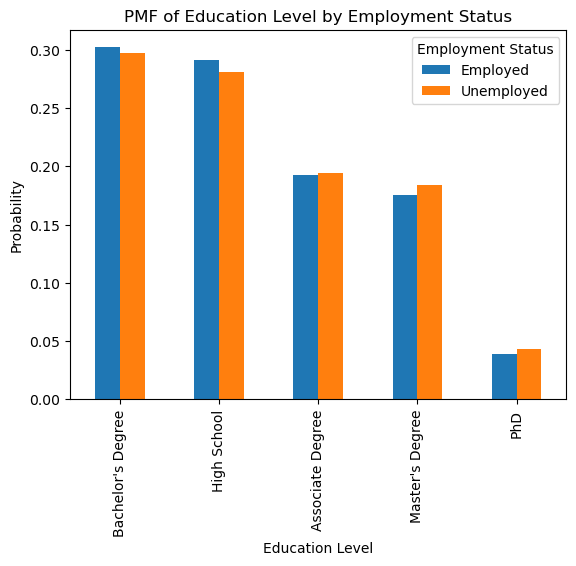

In [326]:
#comparing the variable Employment Status
#variable will be broken up into 'Employed' and 'Unemployed'
employed = depress_data[depress_data['Employment Status'] == 'Employed']
unemployed = depress_data[depress_data['Employment Status'] == 'Unemployed']

#calculate PMF
pmf_employed = employed['Education Level'].value_counts(normalize=True)
pmf_unemployed = unemployed['Education Level'].value_counts(normalize=True)

pmf_df = pd.DataFrame({
    'Employed': pmf_employed,
    'Unemployed': pmf_unemployed
}).fillna(0)

#plot the PMF
pmf_df.plot(kind='bar')
plt.title('PMF of Education Level by Employment Status')
plt.xlabel('Education Level')
plt.ylabel('Probability')
plt.legend(title='Employment Status')

##### Create a CDF (Cumulative Distribution Function) using one variable

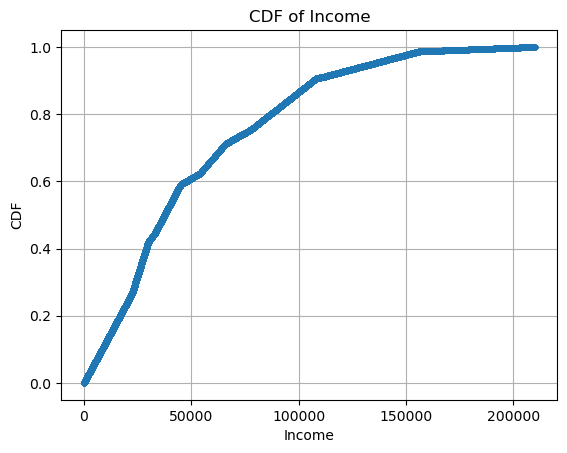

In [332]:
#creating CDF for variable Income
depress_income = depress_data['Income']

#sort the data
depress_income_sorted = np.sort(depress_income)

#calculate CDF
cdf = np.arange(1, len(depress_income_sorted) +1) / len(depress_income_sorted)

#plot the CDF
plt.plot(depress_income_sorted, cdf, marker='.', linestyle='none')
plt.title('CDF of Income')
plt.xlabel('Income')
plt.ylabel('CDF')
plt.grid(True)

##### Plot 1 analytical distribution

Text(0, 0.5, 'Density')

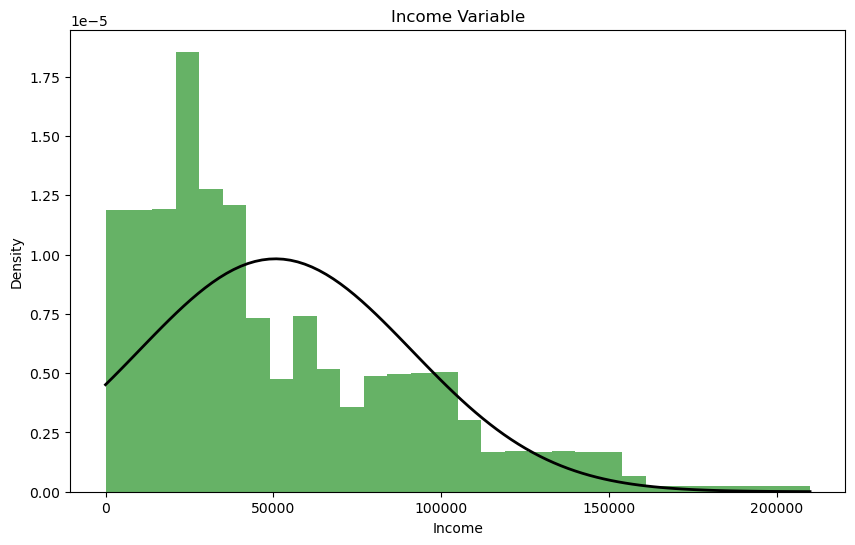

In [345]:
#creating a normal probabilty plot for the variable Income
income_data = depress_data['Income'].dropna()

#calculate the mean and standard deviation of Income
mean_income = income_data.mean()
std_income = income_data.std()

#generating points on the x-axis
x = np.linspace(income_data.min(), income_data.max(), 100)

#calculate the normal distribution
pdf = stats.norm.pdf(x, mean_income, std_income)

#plot the histogram of Income
plt.figure(figsize=(10, 6))
plt.hist(income_data, bins=30, density=True, alpha=0.6, color='green')

#plot the normal distribution curve
plt.plot(x, pdf, 'k', linewidth=2)
plt.title('Income Variable')
plt.xlabel('Income')
plt.ylabel('Density')

##### Create 2 scatter plots comparing two variables.

Text(0, 0.5, 'Income')

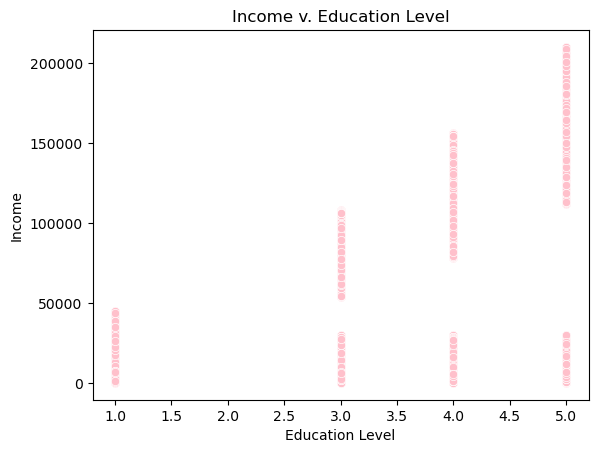

In [412]:
#scatterplot comparing Income v Education Level
#convert Income to numerical
depress_data['Income'] = pd.to_numeric(depress_data['Income'])

#remove na 
depress_scatter = depress_data.dropna(subset=['Income','Education Level'])

#convert Education Level to numerical
ed_data_scatter = { 'High School': 1,
                   'Associate\s Degree': 2,
                   'Bachelor\'s Degree': 3,
                   'Master\'s Degree': 4,
                   'PhD': 5}

depress_scatter['Education Level'] = depress_scatter['Education Level'].map(ed_data_scatter)

#create scatter plot
sns.scatterplot(x='Education Level', y='Income', data=depress_scatter, color='pink')
plt.title('Income v. Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')

Text(0, 0.5, 'Income')

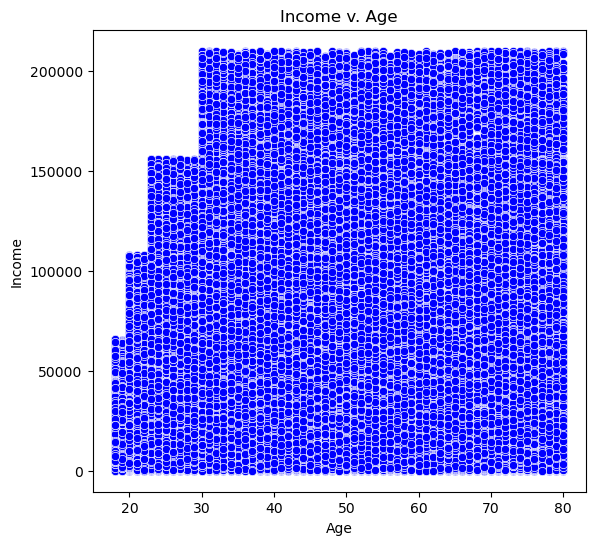

In [414]:
#scatter plot comparing Income and Age
#convert Income to numerical
depress_data['Income'] = pd.to_numeric(depress_data['Income'])

#convert Age to numerical
depress_data['Age'] = pd.to_numeric(depress_data['Age'])

#remove na
depress_scatter = depress_data.dropna(subset=['Income','Age'])

#create scatter plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Income', data=depress_data, color='blue')
plt.title('Income v. Age')
plt.xlabel('Age')
plt.ylabel('Income')

##### Conduct a test on your hypothesis